# TW1 


## Exploratory Data Analysis

#### Write full names of your team members here

- Sean Dempsey
- Samantha Fisher
- Marco Rodriguez
- Jocelin Darma


## Part 1: Advertising data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

A toy dataset for your exploratory data analysis:

./data/Advertising.csv

In [2]:
import pandas as pd

# read CSV file stored in the current directory and save the results
data = pd.read_csv('./data/Advertising.csv', skipinitialspace=True, index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9


What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [30]:
#display all data.

display(data)

data.shape

,TV,Radio,Newspaper,Sales
3/11/19,230.1,37.8,69.2,22.1
3/12/19,44.5,39.3,45.1,10.4
3/13/19,17.2,45.9,69.3,9.3
3/14/19,151.5,41.3,58.5,18.5
3/15/19,180.8,10.8,58.4,12.9
...,...,...,...,...
9/22/19,38.2,3.7,13.8,7.6
9/23/19,94.2,4.9,8.1,9.7
9/24/19,177.0,9.3,6.4,12.8
9/25/19,283.6,42.0,66.2,25.5


(200, 4)

## TW1 Tasks

### Part 1 T

Create cells to solve each of the following problems. Check the example Python codes for data visualization (TW1 on Canvas). 

(1) For each field of the data, what is the mean of the data? What is the median? What is the mode of the data?

(2) For each field of the data, give the five-number summary, minimum, the first quartile (Q1), median, the third quartile (Q3), and maximum of the data.

(3) For each field of the data, visulize a boxplot of the data and compare it to your answer in (b). 

(4) For Sales, visualize distribution of the data using histogram. Comment on the data’s modality (i.e., bimodal, trimodal, etc.)

(5) For Sales, visualize the trend of the data over time using a graph. 

(6) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), calculate the Pearson's correlation coefficient factor r. 

(7) For each pair (TV-Sales, Radio-Sales, Newspaper-Sales), visualize scatter graph. 


In [15]:
for column_name in data.columns:
    col = data[column_name]
    print(f"{column_name} mean={col.mean()} median={col.median()} mode(s)={col.mode().to_list()}")

TV mean=147.0425 median=149.75 mode(s)=[17.2, 76.4, 109.8, 177.0, 184.9, 197.6, 199.8, 222.4, 237.4, 240.1]
Radio mean=23.264000000000024 median=22.9 mode(s)=[4.1, 5.7]
Newspaper mean=30.553999999999995 median=25.75 mode(s)=[8.7, 9.3, 25.6]
Sales mean=14.022500000000003 median=12.9 mode(s)=[9.7]


In [4]:
desc = data.describe()
for column_name in desc.columns:
    col = desc[column_name]
    summary = (col["min"], col["25%"], col["50%"], col["75%"], col["max"])
    print(f"{column_name} (min, Q1, median, Q3, max): {summary}")

TV (min, Q1, median, Q3, max): (0.7, 74.375, 149.75, 218.825, 296.4)
Radio (min, Q1, median, Q3, max): (0.0, 9.975, 22.9, 36.525, 49.6)
Newspaper (min, Q1, median, Q3, max): (0.3, 12.750000000000002, 25.75, 45.1, 114.0)
Sales (min, Q1, median, Q3, max): (1.6, 10.375, 12.9, 17.4, 27.0)


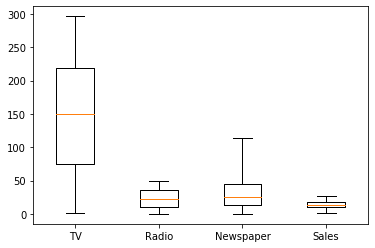

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.boxplot([data[col] for col in data.columns], whis='range', labels=data.columns)
plt.show()

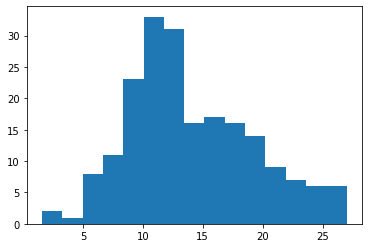

In [42]:
plt.hist(data.Sales, bins=15)
plt.show()

The data looks to be unimodal.

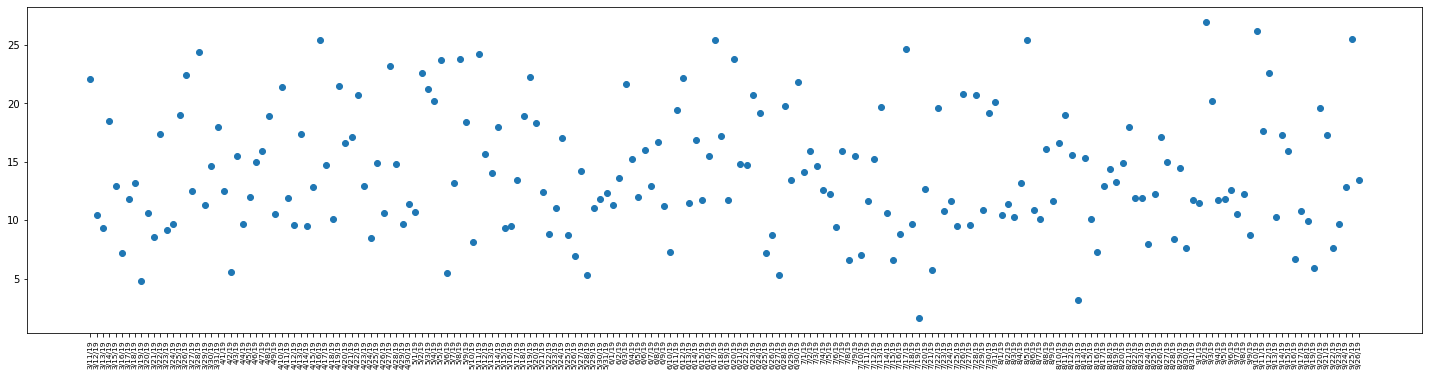

In [8]:
plt.figure(figsize=(25, 6))
plt.plot(data.Sales, "o")
plt.xticks(rotation=90, size=7.5)
plt.show()

In [10]:
corr = data.corr()
for column_name in corr.drop("Sales", axis=1):
    print(f"r({column_name}/Sales)={corr[column_name].Sales}")

r(TV/Sales)=0.782224424861606
r(Radio/Sales)=0.5762225745710553
r(Newspaper/Sales)=0.22829902637616525


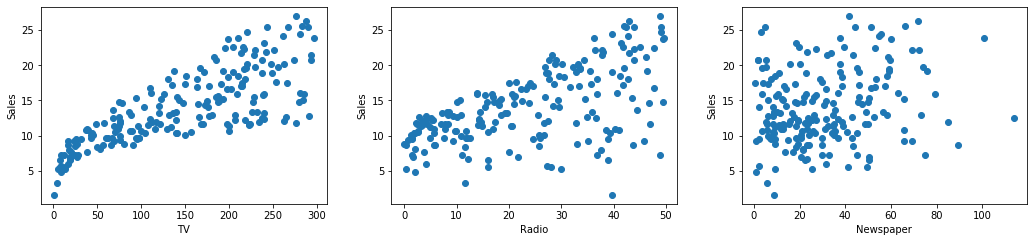

In [98]:
df = data.drop("Sales", axis=1)
plt.figure(figsize=(15, 4))
for column_name, index in zip(df.columns, range(1, len(df.columns) + 1)):
    plt.subplot(1, len(df.columns), index)
    plt.scatter(data[column_name], data.Sales)
    plt.xlabel(column_name)
    plt.ylabel("Sales")
plt.tight_layout(pad=3)
plt.show()

### Part 2
Write a summary of what you find from the data

TV is very strongly correlated to sales, radio is strongly correlated, and newspaper is weakly correllated. There doesn't seem to be any trend in sales over time. Sales is a unimodal distribution.

## Example of Data Visualization with larger datasets

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

Instructions:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

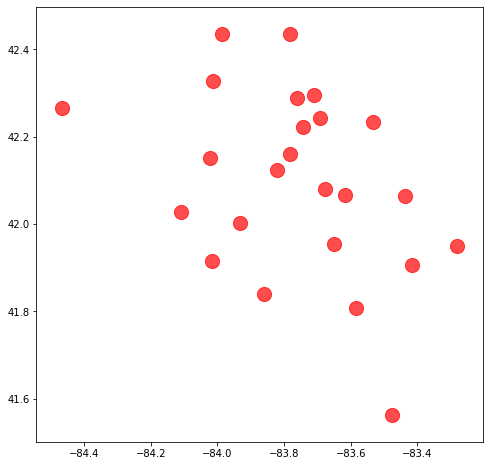

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

binsize = 400
hashid = 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89'

df = pd.read_csv('data/BinSize_d{}.csv'.format(binsize))
df.head()


station_locations_by_hash = df[df['hash'] == hashid]

lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()

plt.figure(figsize=(8,8))

plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

plt.show()


### Explore insight of the data using other visualization tools